In [ ]:
from google.colab import drive
from os.path import join
ROOT = '/content/drive'     # default for the drive
PROJ = 'My Drive/Thesis/Image_analysis'       # path to your project on Drive
drive.mount(ROOT)           # we mount the drive at /content/drive

Mounted at /content/drive


In [ ]:
cd drive/My\ Drive/Thesis/Image_analysis

/content/drive/My Drive/Thesis/Image_analysis


## Whole image quantification

In [ ]:
import skimage
from skimage import data
from skimage import io
import plotly
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
from skimage import (
    color, feature, filters, measure, morphology, segmentation, util
)
from scipy import ndimage
from os import listdir
import pandas as pd
import numpy as np
matplotlib.rcParams['figure.figsize'] = [8, 8]
import seaborn as sns

In [ ]:
img = io.imread('data/TF-screen/d00_1000_2_1.tif')

In [ ]:
path = ('data/TF-screen/d00_1008_3_1.tif')
img = io.imread(path)

In [ ]:
paths = listdir('data/329')
paths = ['data/329/' + s for s in paths]

In [ ]:
def whole_quant(path, ref_ch, quant_ch):
  i = 0
  counts = []
  while i < len(path):
    img = io.imread(path[i])
    gaussian_img = skimage.filters.gaussian(img[ref_ch], sigma=4)
    val = filters.threshold_otsu(gaussian_img)
    mask = gaussian_img > val
    mask_fill=ndimage.binary_fill_holes(mask).astype('int')
    img_masked = mask_fill*img[quant_ch]
    count=img_masked.sum()/mask_fill.sum()
    #fig, ax = plt.subplots()
    #ax.imshow(mask_fill, cmap='gray')
    #plt.show()
    counts.append(count)
    i = i + 1
  return counts

In [ ]:
res = whole_quant(paths, 1, 0)

In [ ]:
days = list()
line = list()
treatment = list()
#Iterate over mylist items
for item in paths:
 #split the element string into a list of words
 item = item.replace('-', '_')
 item = item.replace('.', '_')
 itemWords = item.split('_')
 #extend newlist to include all itemWords
 days.append(itemWords[1])
 line.append(itemWords[3])
 treatment.append(itemWords[5])

df = pd.DataFrame()
df['paths'] = paths
df['val'] = res
df['days'] = days
df['line'] = line
df['treatment'] = treatment
df_d00 = df[df['days'] == 'd00']
df_d02 = df[df['days'] == 'd02']
mean_d00_l2 = df_d00[df_d00['line'] == '2']['val'].sum()/len(df_d00[df_d00['line'] == '2']['val'])
mean_d02_l2 = df_d02[df_d02['line'] == '2']['val'].sum()/len(df_d02[df_d02['line'] == '2']['val'])
mean_d00_l4 = df_d00[df_d00['line'] == '4']['val'].sum()/len(df_d00[df_d00['line'] == '4']['val'])
mean_d02_l4 = df_d02[df_d02['line'] == '4']['val'].sum()/len(df_d02[df_d02['line'] == '4']['val'])

df_d00['val_norm_line'] = np.where(df_d00['line'] == '2', df_d00['val']/mean_d00_l2, df_d00['val']/mean_d00_l4)
df_d02['val_norm_line'] = np.where(df_d02['line'] == '2', df_d02['val']/mean_d02_l2, df_d02['val']/mean_d02_l4)
df = df_d00.append(df_d02)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['treatment_days'] = df['treatment'] + '_' + df['days']

df['treatment_days'] = pd.Categorical(df['treatment_days'],
                                   categories=['Ctrl_d00', 'Ctrl_d02', 'Sucrose_d00', 'Sucrose_d02', '100uMKin_d00', '100uMKin_d02', '100uMBAP_d00', '100uMBAP_d02'],
                                   ordered=True)

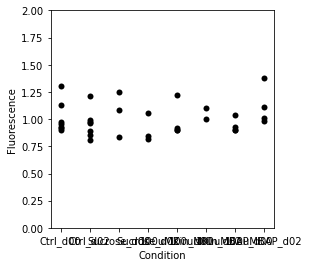

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x='treatment_days', y='val_norm_line', data=df, color='black', linewidth=0)
plt.ylim(0,2)
plt.xlabel('Condition')
plt.ylabel('Fluorescence')

plt.savefig('figures/CYCD1_treatments.pdf')
plt.show()

In [ ]:
df.to_csv('output/329_quant.csv')